# Méthode de Régularisation : Lasso / Ridge / ElasticNet


Dans le domaine des mathématiques et des statistiques, et plus particulièrement dans le domaine de l'apprentissage automatique, la régularisation fait référence à un processus consistant à **ajouter de l'information à un problème pour éviter le surapprentissage. Cette information prend généralement la forme d'une pénalité envers la complexité du modèle.** D'un point de vue bayésien, l'utilisation de la régularisation revient à imposer une distribution a priori sur les paramètres du modèle. 

## Consigne du jour


### Objectifs 
Comprendre ces trois approches en les appliquant sur un cas pratique : le pricing d'un appartement ! 

### Livrables
Vous avez 2 livrables à m'envoyer **pour le vendredi 19 juin 2019 23h59** : 
- Ce notebook complété avec les commentaires en conséquence (Sujet / Verbe / Complément)
- Un résumé de veille  sur les méthodes de régularisation Ridge, Lasso et ElasticNet. Les prises de notes ne sont pas valables. Vous pouvez vous inspirer de votre atelier Dataiku afin de créer un petit article synthétique. Je n'attends pas de code Python sur ce résumé.



# I. Preprocessing

**1. Importer vos librairies**

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn

**2. Importer les données boston depuis scikitlearn et afficher les dimensions.**

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()


In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.data.shape

(506, 13)

In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**3. Comment sont stockées vos donnnées?**

In [10]:
print( "type of boston = ", type(boston))

type of boston =  <class 'sklearn.utils.Bunch'>


**4. Transformez vos variables explicatives en en dataframe et récupérer la target appelée `MEDV`. Vous trouverez ci-bas le détail des features.**

In [11]:
bostonDF = pd.DataFrame(boston.data)
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#on ajoute la colonne name
bostonDF.columns = boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
MEDV = pd.DataFrame(boston.target)
MEDV.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


##### data: contains the information for various houses
##### target: prices of the house
##### feature_names: names of the features
##### DESCR: describes the dataset

###### CRIM: Per capita crime rate by town
##### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
##### INDUS: Proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
##### NOX: Nitric oxide concentration (parts per 10 million)
##### RM: Average number of rooms per dwelling
##### AGE: Proportion of owner-occupied units built prior to 1940
##### DIS: Weighted distances to five Boston employment centers
##### RAD: Index of accessibility to radial highways 
##### TAX: Full-value property tax rate per $10,000$

##### PTRATIO: Pupil-teacher ratio by town
##### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
##### LSTAT: Percentage of lower status of the population
##### MEDV: Median value of owner-occupied homes in $1000s

**5. Missing Values.**

In [ ]:
bostonDF.isnull().sum()

**6. Analyser la distibution de la target et analyser la corrélation des features.**

In [14]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


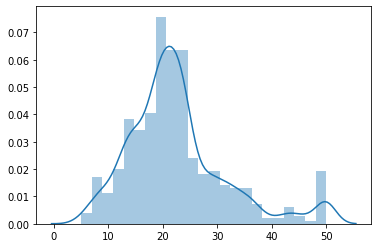

In [15]:
import matplotlib.pyplot as plt
attr = MEDV
#plt.hist(attr, bins=50)
sns.distplot(MEDV)

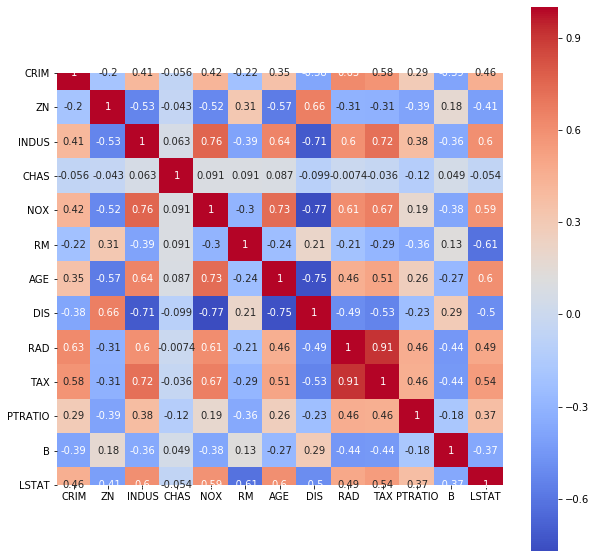

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(bostonDF.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


**7. Analyser les relations entre la target et les variables `LSTAT` et `RM`.**

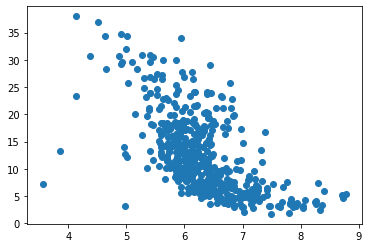

In [17]:
plt.scatter(bostonDF['RM'], bostonDF['LSTAT'])

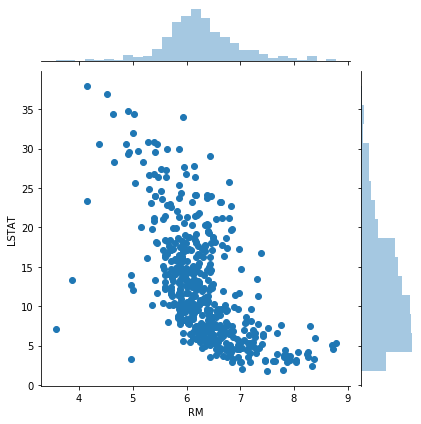

In [18]:
sns.jointplot(bostonDF['RM'], bostonDF['LSTAT'], kind='scatter')

**8. Les variables catégorielles sont mal traitées. Corriger cela.**

In [19]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [20]:
bostonDF.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [21]:
bostonDF['CHAS'] = bostonDF.CHAS.astype('int')
bostonDF['RAD'] = bostonDF.RAD.astype('int')
bostonDF.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int32
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int32
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [22]:
bostonDF['CHAS'] = bostonDF.CHAS.astype('category')
bostonDF['RAD'] = bostonDF.RAD.astype('category')
bostonDF.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [23]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


**9. Train Test Split avec `random_state = 42`. Afficher les dimensions des objets obtenus.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [26]:
X = bostonDF
y = MEDV
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=42)
print("shape X_train", X_train.shape)
print("shape X_test", X_test.shape)
print("shape y_train", y_train.shape)
print("shape y_test", y_test.shape)

shape X_train (339, 13)
shape X_test (167, 13)
shape y_train (339, 1)
shape y_test (167, 1)


In [ ]:
# II. Régression linéaire

**1. A des fins de comparaions, modéliser un premier modèle de régression linéaire avec toutes les variables et évaluer les performances du modèle.**

In [27]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predictions_train = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, predictions_train)))
linR_train = r2_score(y_train, predictions_train)

print("train RMSE is {}".format(rmse.round(2)))
print("train R2 is {}".format(lmodellineaire_train.round(2)))

rmse_train = format(rmse.round(2))
r2_train = format(lmodellineaire_test.round(2))

predictions_test = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, predictions_test)))
lmodellineaire_test = r2_score(y_test, predictions_test)

print("test RMSE is {}".format(rmse.round(2)))
print("test R2 is {}".format(lmodellineaire_test.round(2)))

rmse_test = format(rmse.round(2))
r2_test = format(lmodellineaire_test.round(2))


train RMSE is 4.79


NameError: name 'lmodellineaire_train' is not defined

# III. Régression Ridge

**1. Rappelez le principe de la méthode et la pénalisation Ridge.**

**2. Quels sont les paramètres à faire varier?**

**3. Instancier un modèle `Ridge` en faisant varier le paramètre `alpha` avec une `GridSearchCV` (5k-fold) et lala liste ci dessous.**

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]

In [33]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regress_train = GridSearchCV(ridge, parameters, scoring="r2", cv=5)
ridge_regress_train.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [34]:
print(ridge_regress_train.best_params_)
print(ridge_regress_train.best_score_)
print(ridge_regress_train.best_estimator_)

predtrain_ridge = ridge_regress_train.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,predtrain_ridge)))
print(r2_score(y_train, predtrain_ridge))


{'alpha': 0.1}
0.7083318941188761
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
4.7949410589153505
0.7391613306913565


In [35]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regress_test = GridSearchCV(ridge, parameters, scoring="r2", cv=5)
ridge_regress_test.fit(X_test,y_test)
ridge_regress_test.score(X_test,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7428001281379153

In [36]:
print(ridge_regress_test.best_params_)
print(ridge_regress_test.best_score_)
print(ridge_regress_test.best_estimator_)
predtest_ridge = ridge_regress_test.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predtest_ridge))) 
print(r2_score(y_test, predtest_ridge))

{'alpha': 20}
0.6699007450312874
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
4.411859319619642
0.7428001281379153


**4. Evaluer votre modèle. Afficher le meilleur paramètre et le meilleur score obtenu.**

https://scikit-learn.org/stable/modules/model_evaluation.html

# IV. Régression Lasso

**1. Rappelez le principe de la méthode et la pénalisation Lasso.**

**2. Quels sont les paramètres à faire varier?**

**3. Instancier un modèle `Lasso` en faisant varier le paramètre `alpha` avec une `GridSearchCV` (5k-fold) et lala liste ci dessous.**

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
lasso_regress_train = GridSearchCV(lasso, parameters, scoring="r2", cv=5)
%time lasso_regress_train.fit(X_train,y_train)

print(lasso_regress_train.best_params_)
print(lasso_regress_train.best_score_)
print(lasso_regress_train.best_estimator_)
predtrain_lasso = lasso_regress_train.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,predtrain_lasso)))
print(r2_score(y_train, predtrain_lasso))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720.182020776057, tolerance: 2.2835709077490773
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3028.488747955199, tolerance: 2.4934183837638377
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2537.997844536772, tolerance: 2.1595952398523988
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

Wall time: 463 ms
{'alpha': 0.001}
0.7083077493400435
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
4.79430889841431
0.73923010360525


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
#sorted(sklearn.metrics.SCORERS.keys())

**4. Evaluer votre modèle en utilisant le paramètre `scoring` adéquat et afficher le meilleur paramètre et le meilleur score obtenu.**

https://scikit-learn.org/stable/modules/model_evaluation.html

# V. Elasticnet

**1. Rappelez le principe de la méthode et la pénalisation ElasticNet.**

**2. Quels sont les paramètres à faire varier?**

**3. Instancier un modèle `ElasticNet` en faisant varier le paramètre `alpha` avec une `GridSearchCV` (5k-fold) et lala liste ci dessous.**

In [40]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic_net_test = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_test, y_test)

scores_test = cross_val_score(elastic_net_test,X_test,y_test,cv=5,scoring='r2')

print('CV Mean: ', np.mean(scores_test))
print('STD: ', np.std(scores_test))

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid_test = GridSearchCV(estimator=elastic_net_test, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_test = grid_test.fit(X_test, y_test)

print('meilleur  score: ', grid_result_test.best_score_)
print('meileur  parametre: ', grid_result_test.best_params_)

CV Mean:  0.6495274342045216
STD:  0.06333945092055268
Fitting 3 folds for each of 84 candidates, totalling 252 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s


meilleur  score:  0.6185531670765596
meileur  parametre:  {'alpha': 1, 'l1_ratio': 1e-15}


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    6.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915.2013953217186, tolerance: 1.2638310898203593
  positive)


**4. Evaluer votre modèle en utilisant le paramètre `scoring` adéquat et afficher le meilleur paramètre et le meilleur score obtenu.**

https://scikit-learn.org/stable/modules/model_evaluation.html

# VI. Résultats.

**Regrouper vos résultats dans un dataframe et interpréter.**

https://scikit-learn.org/stable/modules/model_evaluation.html

In [60]:
Res = {"rmse train:": rmse_train,"R2 train:" : r2_train,"rmse test:" : rmse_test,
"R2 test:" : r2_test, "ridge train best params": ridge_regress_train.best_params_,"ridge train best score": ridge_regress_train.best_score_,
"ridge train best estimator" : ridge_regress_train.best_estimator_,"ridge test best params" : ridge_regress_test.best_params_,
"ridge test best score" : ridge_regress_test.best_score_, "ridge test best estimator" : ridge_regress_test.best_estimator_,
"lasso train best params" : lasso_regress_train.best_params_, "lasso train best score" : lasso_regress_train.best_score_,
"lasso train best estimator" : lasso_regress_train.best_estimator_, "lasso test best params" : lasso_regress_test.best_params_,
"lasso test best score" : lasso_regress_test.best_score_,"lasso test best estimator" : lasso_regress_test.best_estimator_,
'grid train best score': grid_result_train.best_score_,'grid train best params' : grid_result_train.best_params_,
'grid test best score' : grid_result_test.best_score_, 'grid test best params' : grid_result_test.best_params_}

NameError: name 'rmse_train' is not defined

In [ ]:
pd.DataFrame(Res)